<a href="https://colab.research.google.com/github/ZakVB/BMEN6367/blob/main/Homework_4_UpdatedParams_SplitSize_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Import Libraries
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [12]:
#Label Data
Categories=['glioma_tumor','meningioma_tumor', 'no_tumor', 'pituitary_tumor']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/My Drive/BMEN 6367/BrainMRI/Training'#path which contains all the categories of training images

for i in Categories:
	print(f'Now Loading Category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'Loaded {i} images successfully\n')

flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


Now Loading Category : glioma_tumor
Loaded glioma_tumor images successfully

Now Loading Category : meningioma_tumor
Loaded meningioma_tumor images successfully

Now Loading Category : no_tumor
Loaded no_tumor images successfully

Now Loading Category : pituitary_tumor
Loaded pituitary_tumor images successfully



In [13]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(2870, 67501)

In [14]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [15]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [16]:
# Creating a support vector classifier
pca = RandomizedPCA(n_components= 150,whiten=True,random_state =42)
svc=SVC(class_weight = 'balanced')
model = make_pipeline(pca,svc)

# Defining the parameters grid for GridSearchCV
param_grid={'svc__C':[1,5,10,50,100,500], 'svc__gamma':[0.0001,0.0005,0.001,0.005,0.01,0.05], 'svc__kernel':['rbf']}

# Creating a model using GridSearchCV with the parameters grid
grid=GridSearchCV(model,param_grid)
%time grid.fit(x_train,y_train)
print(grid.best_params_)

CPU times: user 2h 42min 58s, sys: 14min 37s, total: 2h 57min 35s
Wall time: 1h 53min 51s
{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [17]:
# Testing the model using the testing data
model = grid.best_estimator_
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 90.41811846689896% accurate


              precision    recall  f1-score   support

      Glioma       0.90      0.92      0.91       165
  Meningioma       0.82      0.90      0.86       164
    No Tumor       0.94      0.75      0.83        79
   Pituitary       0.98      0.98      0.98       166

    accuracy                           0.90       574
   macro avg       0.91      0.88      0.89       574
weighted avg       0.91      0.90      0.90       574



Text(109.44999999999997, 0.5, 'Prediction')

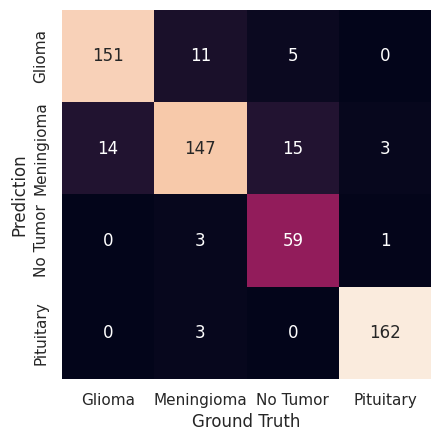

In [18]:
#Print Classification Report and Confusion Matrix
MRI_classes=['Glioma', 'Meningioma','No Tumor','Pituitary']
print(classification_report(y_test, y_pred, target_names=MRI_classes))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square = True,annot = True,fmt='d',cbar=False,xticklabels=MRI_classes,yticklabels=MRI_classes)
plt.xlabel('Ground Truth')
plt.ylabel("Prediction")

Now Loading Category : glioma_tumor
Loaded glioma_tumor images successfully

Now Loading Category : meningioma_tumor
Loaded meningioma_tumor images successfully

Now Loading Category : no_tumor
Loaded no_tumor images successfully

Now Loading Category : pituitary_tumor
Loaded pituitary_tumor images successfully

The model is 71.57360406091371% accurate
              precision    recall  f1-score   support

      Glioma       0.92      0.22      0.35       100
  Meningioma       0.65      0.95      0.77       115
    No Tumor       0.68      0.96      0.80       105
   Pituitary       0.93      0.68      0.78        74

    accuracy                           0.72       394
   macro avg       0.79      0.70      0.68       394
weighted avg       0.78      0.72      0.67       394



Text(109.44999999999997, 0.5, 'Prediction')

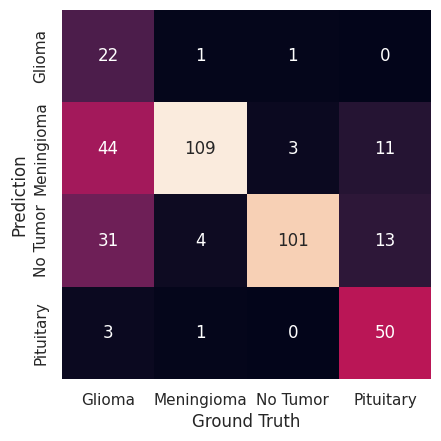

In [19]:
#Testing the Data with the data in the Test Folder
#Label Data
Categories=['glioma_tumor','meningioma_tumor', 'no_tumor', 'pituitary_tumor']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/My Drive/BMEN 6367/BrainMRI/Testing'#path which contains all the categories of training images

for i in Categories:
	print(f'Now Loading Category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'Loaded {i} images successfully\n')

flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

#input data
x=df.iloc[:,:-1]
y_test = df.iloc[:,-1]
#output data
y_pred = model.predict(x)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

#Print Classification Report and Confusion Matrix
MRI_classes=['Glioma', 'Meningioma','No Tumor','Pituitary']
print(classification_report(y_test, y_pred, target_names=MRI_classes))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square = True,annot = True,fmt='d',cbar=False,xticklabels=MRI_classes,yticklabels=MRI_classes)
plt.xlabel('Ground Truth')
plt.ylabel("Prediction")